# Rad Lab

J305 (107 mm) Geiger-Müller tube simulations

© 2025 by Gissio

## Settings

In [ ]:
detector_geometry = "data/geometry.toml"
detector_label = "J305 (107 mm)"
N_montecarlo = 1000000
# N_montecarlo = 100000000

## Detector geometry

![J305 Geometry](data/geometry.png)

In [2]:
import sys
if '../../tools' not in sys.path:
    sys.path.append('../../tools')

import radlab

# %matplotlib widget

source_area = radlab.get_source_area(detector_geometry)
energies, efficiencies = radlab.simulate_gm_energies(
    detector_geometry, N_montecarlo)
angles, angular_response = radlab.simulate_gm_angles(
    detector_geometry, N_montecarlo)

## Detector efficiency

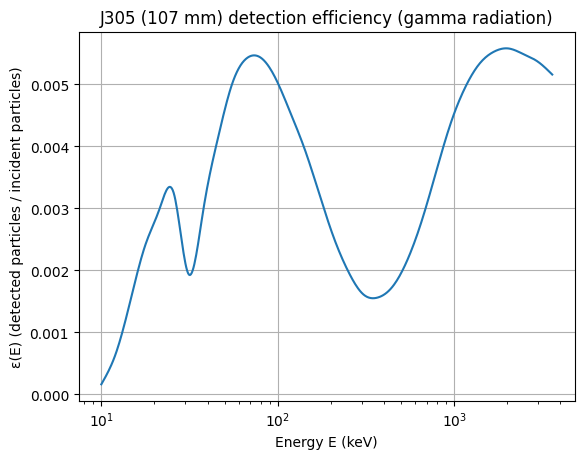

In [3]:
radlab.plot_semilogx(f'{detector_label} detection efficiency (gamma radiation)',
                     energies, efficiencies, "ε(E) (detected particles / incident particles)")

## Ambient dose equivalent sensitivity

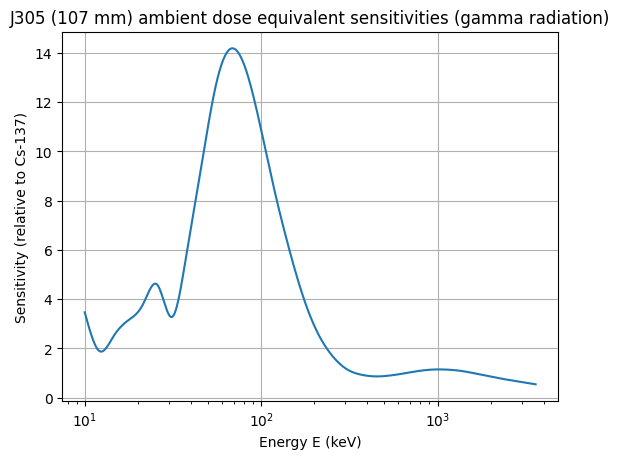

In [4]:
ambient_dose_equivalent_sensitivities = radlab.calculate_ambient_dose_equivalent_sensitivities(
    energies, efficiencies, source_area)

radlab.plot_semilogx(f'{detector_label} ambient dose equivalent sensitivities (gamma radiation)',
                     energies, ambient_dose_equivalent_sensitivities, "Sensitivity (relative to Cs-137)", normalize_cs137=True)

## Angular response

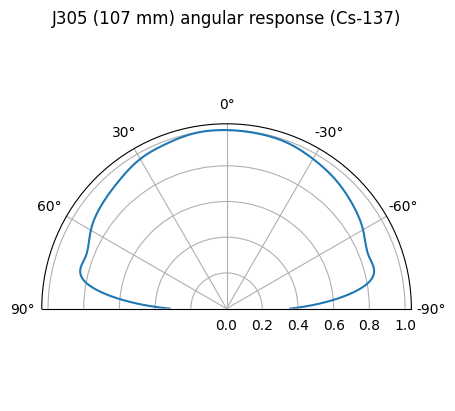

In [5]:
radlab.plot_polar(
    f'{detector_label} angular response (Cs-137)', angles, angular_response)

## Sensitivity for various sources

In [6]:
source_sensitivities = radlab.calculate_source_sensitivities(
    energies, ambient_dose_equivalent_sensitivities)

radlab.print_source_sensitivities(source_sensitivities)

| Source | Sensitivity (cpm/µSv/h) | Relative sensitivity (Cs-137) |
|-|-|-|
| Cs-137 | 135.115 | 1.000 |
| Co-60 | 150.748 | 1.116 |
| Tc-99m | 864.944 | 6.402 |
| I-131 | 134.033 | 0.992 |
| Lu-177 | 472.694 | 3.498 |
| Am-241 | 1614.868 | 11.952 |
| Radium | 143.716 | 1.064 |
| Uranium ore | 163.656 | 1.211 |
| Uranium glaze | 184.852 | 1.368 |
| Depleted uranium | 182.897 | 1.354 |
| Thorium ore | 150.522 | 1.114 |
| X-ray tube (60 kV) | 740.192 | 5.478 |
| K-40 | 142.292 | 1.053 |
| Natural background | 377.079 | 2.791 |
